In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_hastie_10_2
import matplotlib.pyplot as plt
%matplotlib inline

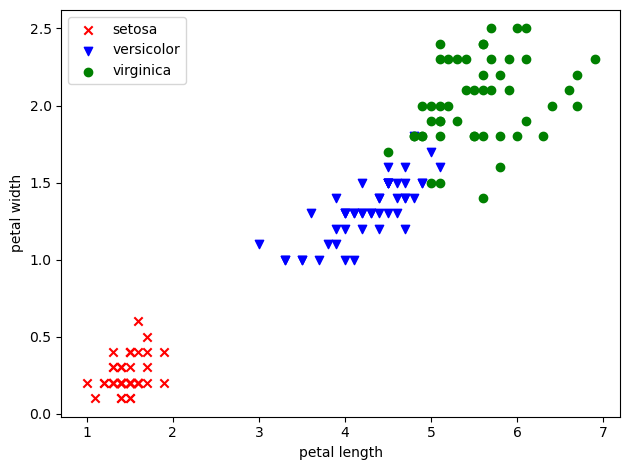

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

X_one=X[:,2:4]

setosa = X_one[y == 0]
ver = X_one[y == 1]
vi=X_one[y == 2]

plt.scatter(setosa[:, 0], setosa[:, 1],c='r',marker='x',  label='setosa')
plt.scatter(ver[:, 0], ver[:, 1],c='b',marker='v', label='versicolor')
plt.scatter(vi[:, 0], vi[:, 1],c='g',marker='o', label='virginica')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc=2)
plt.tight_layout()
plt.show()

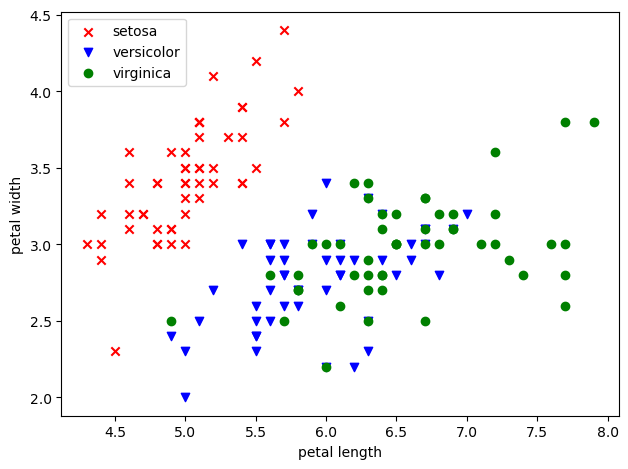

In [4]:
X_two=X[:,0:2]#前两列特征

setosa = X_two[y == 0]
ver = X_two[y == 1]
vi=X_two[y == 2]

plt.scatter(setosa[:, 0], setosa[:, 1],c='r',marker='x',  label='setosa')
plt.scatter(ver[:, 0], ver[:, 1],c='b',marker='v', label='versicolor')
plt.scatter(vi[:, 0], vi[:, 1],c='g',marker='o', label='virginica')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc=2)
plt.tight_layout()
plt.show()

In [51]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_X = pca.fit_transform(X)
print(reduced_X.shape)

(150, 2)


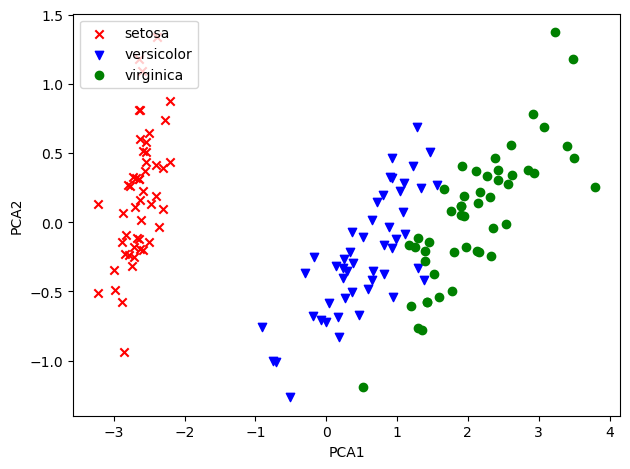

In [6]:
setosa = reduced_X[y == 0]
ver = reduced_X[y == 1]
vi=reduced_X[y == 2]

plt.scatter(setosa[:, 0], setosa[:, 1],c='r',marker='x',  label='setosa')
plt.scatter(ver[:, 0], ver[:, 1],c='b',marker='v', label='versicolor')
plt.scatter(vi[:, 0], vi[:, 1],c='g',marker='o', label='virginica')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(loc=2)
plt.tight_layout()
plt.show()

In [52]:
X_train, X_test, y_train, y_test = train_test_split(reduced_X, y, test_size=0.3, random_state=123)
print(X_train.shape)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

(105, 2)


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import time

In [9]:
clf1=LogisticRegression()
clf2=RandomForestClassifier()
clf3=AdaBoostClassifier()
clf4=svm.SVC(C=1.0,kernel='linear',decision_function_shape='ovr',gamma=0.01)
clf5=KNeighborsClassifier(n_neighbors=5)

classifiers = [clf1, clf2, clf3, clf4, clf5]
labels = ['LogisticRegression', 'RandomForest', 'AdaBoost', 'SVM', 'KNN']
for clf, label in zip(classifiers, labels):
    start = time.time()
    scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=10)
    end = time.time()
    run_time = end - start
    print(f"Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f}), 耗时 {run_time:.2f} 秒. 模型名称[{label}]")

NameError: name 'X_train' is not defined

In [ ]:
def plot_decision_boundary(model,axis):
    x0,x1 = np.meshgrid(
        np.linspace(axis[0]-1,axis[1]+1,int((axis[1]-axis[0])*100)),
        np.linspace(axis[2]-1,axis[3]+1,int((axis[3]-axis[2])*100))
    )
    X_new = np.c_[x0.ravel(),x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0,x1,zz,linewidth=5,cmap=custom_cmap)

In [ ]:
for clf, label in zip([clf1, clf2, clf3, clf4, clf5],
                      ['Logistic Regression', 'Random Forest', 'AdaBoost', 'SVM', 'KNN']):
    x_combined_std = np.vstack((X_train_std, X_test_std))
    y_combined = np.hstack((y_train, y_test))
    clf.fit(X_train_std, y_train)
    
    min_1, max_1 = x_combined_std[:, 0].min(), x_combined_std[:, 0].max()
    min_2, max_2 = x_combined_std[:, 1].min(), x_combined_std[:, 1].max()
    
    plot_decision_boundary(clf, axis=[min_1, max_1, min_2, max_2])
    
    class_0 = x_combined_std[y_combined == 0]
    class_1 = x_combined_std[y_combined == 1]
    class_2 = x_combined_std[y_combined == 2]
    
    plt.scatter(class_0[:, 0], class_0[:, 1], c='red', marker='x', label='Class 0')
    plt.scatter(class_1[:, 0], class_1[:, 1], c='blue', marker='v', label='Class 1')
    plt.scatter(class_2[:, 0], class_2[:, 1], c='green', marker='o', label='Class 2')
    
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    plt.title(label)
    plt.tight_layout()
    plt.show()

NameError: name 'clf1' is not defined